In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

Clight = 299792458.       # speed of light (m/s)
H100   = 3.24455e-18      # Hubble parameter (1/s)  100*1000/(10**6*3.26*Clight*365*24*3600)  
YEAR   = 3.15581497632e7  # time of one year (s)

In [50]:
#add the numerical data of overlap reduction function
R_file_path = "R.txt"
R_data = np.loadtxt(R_file_path)
R_freq = R_data[:,0]
R_values = R_data[:,1]*2
R_interp1d = interp1d(R_freq, R_values)

#define the numerical overlap reduction function
def R_num(f_fstar):          
    result = f_fstar
    return R_interp1d(result)

#define the analytic fit form of overlap reduction function
def R_fit(f_fstar):
    result = 3./10./(1. + 6./10.*(f_fstar)**2)
    return result

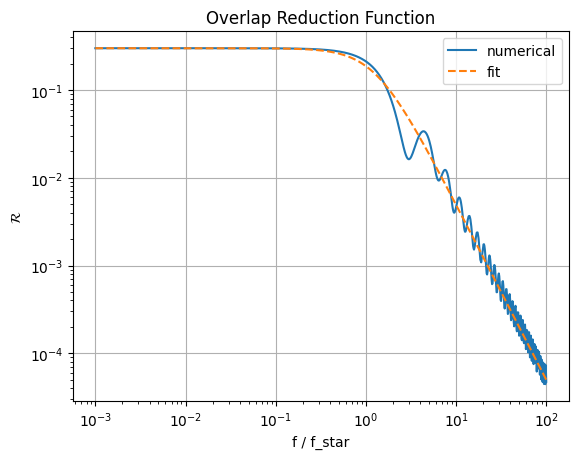

In [56]:
#compare the fit formula and numerical data
x_values   = np.logspace(-3,2,1000)
fit_values = R_fit(x_values)
num_values = R_num(x_values)
plt.figure()
plt.loglog(x_values,num_values,label="numerical")
plt.loglog(x_values,fit_values,linestyle="--",label="fit")
plt.xlabel("f / f_star")
plt.ylabel(r"$\mathcal{R}$")
plt.title("Overlap Reduction Function")
plt.legend()
plt.grid()
plt.show()

In [21]:
#This block defines the noise power spectrum

#P_acc  the acceleration noise
#P_oms  the optical measurement noise
#fstar  the character frequence of the arm lenth of detector
#Pn     the noise power spectrum
#R_fun  the overlap reduction function of Michelson-X
#Sn     the effect noise power spectrum  (Sn = Pn/R)

#LISA reference arxiv: 1803.01944 and 1702.00786
    P_acc = P_a**2*(1. + (0.4e-3/f)**2)*(1. + (f/(8.0e-3))**4)
    P_oms =P_o**2*(1. + (2.0e-3/f)**4)
    fstar = Clight/(2*np.pi*Larm)  
    Pn = (P_oms + 2.*(1. + np.cos(f/fstar)**2)*P_acc/(2.*np.pi*f)**4)/Larm**2
    R = R_fun(f/fstar)
    Sn = Pn/R
    return Sn
#TianQin reference arxiv: 2008.10332
def Sn_2(P_a,P_o,Larm,R_fun,f):
    P_acc = P_a**2*(1. + (1e-4/f))
    P_oms =P_o**2
    fstar = Clight/(2*np.pi*Larm)  
    Pn = (P_oms + 2.*(1. + np.cos(f/fstar)**2)*P_acc/(2.*np.pi*f)**4)/Larm**2
    R = R_fun(f/fstar)
    Sn = Pn/R
    return Sn
#Taiji reference https://doi.org/10.1016/j.rinp.2019.102918
def Sn_3(P_o,P_a,Larm,R_fun,f):
    P_acc = P_a**2
    P_oms =P_o**2
    fstar = Clight/(2*np.pi*Larm)  
    Pn = (P_oms + 2.*(1. + np.cos(f/fstar)**2)*P_acc/(2.*np.pi*f)**4)/Larm**2
    R = R_fun(f/fstar)
    Sn = Pn/R
    return Sn

In [22]:
#define the effect noise power spectrum for three detector
def LISA(R_fun,f):
    return Sn_1(P_a=3.0e-15,P_o=10e-12,Larm=2.5e9,R_fun=R_fun,f=f)
def TianQin(R_fun,f):
    return Sn_2(P_a=1.0e-15,P_o=1e-12,Larm=np.sqrt(3)*1e8,R_fun=R_fun,f=f)
def Taiji(R_fun,f):
    return Sn_3(P_a=3.0e-15,P_o=8e-12,Larm=3e9,R_fun=R_fun,f=f)

In [41]:
#draw the figure of Sensitivity Strain  and Characteristic Strain
#produce the frequence data and effect noise power spectrum

#use the fit formula
fmin = 1e-5 
fmax = 10
f_LISA = f_Taiji = f_TQ = np.logspace(np.log10(fmin), np.log10(fmax), 1000)
Sn_LISA = LISA(R_fit,f_LISA)
Sn_Taiji = Taiji(R_fit,f_Taiji)
Sn_TQ = TianQin(R_fit,f_TQ)

# #use the numerical formula
# f_LISA  = np.logspace(np.log10(1e-5), np.log10(1), 1000)
# Sn_LISA = LISA(R_num,f_LISA)
# f_Taiji = np.logspace(np.log10(1e-5), np.log10(1), 1000)
# Sn_Taiji = Taiji(R_num,f_Taiji)
# f_TQ = np.logspace(np.log10(1e-5), np.log10(10), 1000)
# Sn_TQ = TianQin(R_num,f_TQ)

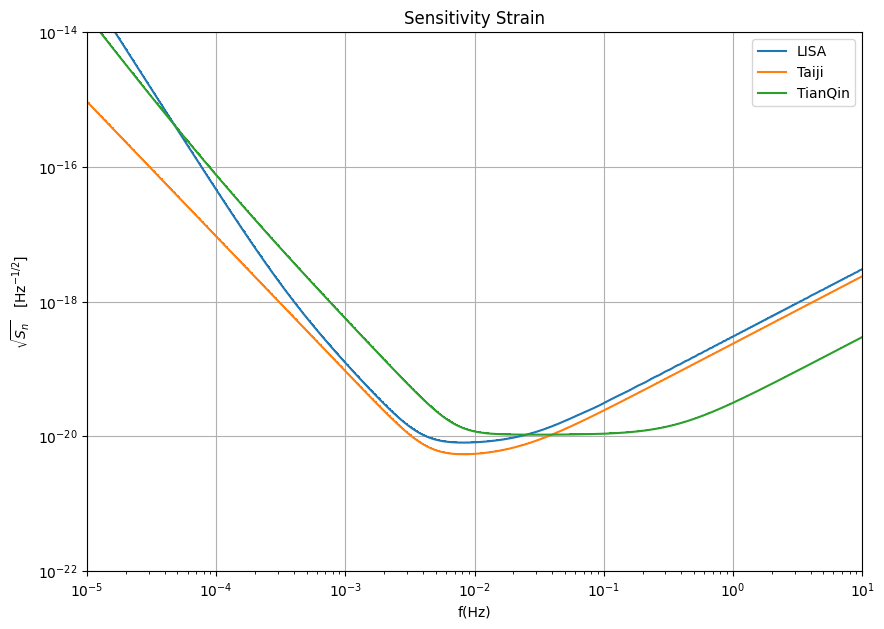

In [42]:
plt.figure(figsize=(10, 7))
plt.loglog(f_LISA,np.sqrt(Sn_LISA), marker=",", linestyle="-",label="LISA")
plt.loglog(f_Taiji,np.sqrt(Sn_Taiji), marker=",", linestyle="-",label="Taiji")
plt.loglog(f_TQ,np.sqrt(Sn_TQ), marker=",", linestyle="-",label="TianQin")

plt.xlim([10**(-5), 10])
plt.ylim([10**(-22),10**(-14)])
plt.xlabel("f(Hz)")
plt.ylabel(r'$\sqrt{S_n}$   $\rm [Hz^{-1/2}]$')
plt.legend()
plt.title('Sensitivity Strain')
plt.grid()
plt.show()